# Visão Computacional - 1ª lista

## Questão 1

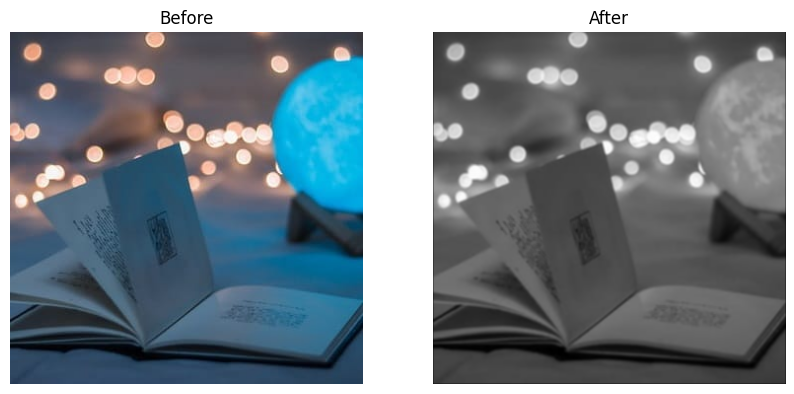

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def apply_filter(image, filter_size: int, filter_weights) -> np.ndarray:
    # convertendo a imagem em um numpy array
    image = np.array(image)

    # adicionando padding na imagem
    padded_image = np.pad(image, filter_size//2, mode='constant')

    # convertendo os pesos em uma matriz
    filter_matrix = np.reshape(filter_weights, (filter_size, filter_size))

    # fazendo a convolução
    filtered_image = np.zeros(image.shape)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            window = padded_image[i:i+filter_size, j:j+filter_size]
            filtered_image[i, j] = np.sum(window * filter_matrix)

    return filtered_image


image = Image.open('./images/q1.ppm').convert('L')

# definindo o tamanho do filtro e os pesos
filter_size = 5
filter_weights = [1, 1, 1, 1, 1,
                  1, 1, 1, 1, 1, 
                  1, 1, 1, 1, 1,
                  1, 1, 1, 1, 1,
                  1, 1, 1, 1, 1]

# aplicando o filtro
filtered_image = apply_filter(image, filter_size, filter_weights)

# normalizando a imagem
filtered_image = (filtered_image - np.min(filtered_image)) / (np.max(filtered_image) - np.min(filtered_image))

# salvando a imagem
# Image.fromarray(np.uint8(filtered_image * 255)).save('./images-out/filtered_q1.ppm')

# displaying on the notebook
image_before = Image.open('./images/q1.ppm')
image_after = Image.open('./images-out/filtered_q1.ppm')
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))

ax1.imshow(image_before)
ax1.set_title('Before')
ax1.set_axis_off()

ax2.imshow(image_after.convert('RGB'))
ax2.set_title('After')
ax2.set_axis_off()

## Questão 2

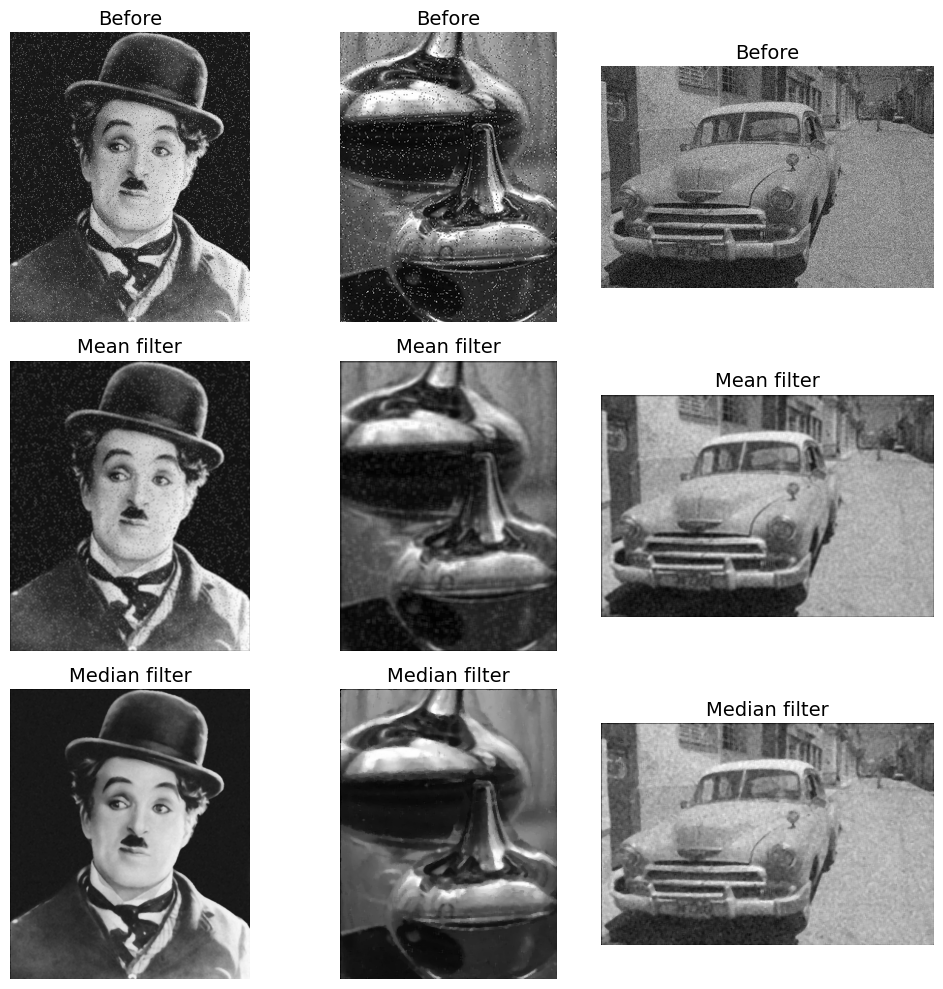

In [2]:
from PIL import Image
from IPython.display import display, HTML
import numpy as np

# Mean filter
def mean_filter(image, filter_size, filter_weights):
    # convertendo a imagem em um numpy array
    image = np.array(image)

    # adicionando padding na imagem
    padded_image = np.pad(image, filter_size//2, mode='constant')

    # convertendo os pesos em uma matriz
    filter_matrix = np.reshape(filter_weights, (filter_size, filter_size))

    filtered_image = np.zeros(image.shape)

    # aplicando mean filter através da convolução 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            window = padded_image[i:i+filter_size, j:j+filter_size]
            filtered_image[i, j] = np.sum(window * filter_matrix) / (np.sum(filter_matrix))

    return filtered_image

# Median filter
def median_filter(image, filter_size, filter_weights):
    image = np.array(image)
    padded_image = np.pad(image, filter_size//2, mode='constant')

    filtered_image = np.zeros(image.shape)

    # median filter através da convolução   
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            window = padded_image[i:i+filter_size, j:j+filter_size]
            filtered_image[i, j] = np.median(window)

    return filtered_image


filter_size = 3
filter_size = 4
filter_weights = [1, 1, 1, 1, 
                  1, 1, 1, 1, 
                  1, 1, 1, 1,
                  1, 1, 1, 1]

image1 = Image.open('./images/q2_1.ppm').convert('L')
image2 = Image.open('./images/q2_2.ppm').convert('L')
image3 = Image.open('./images/q2_3.ppm').convert('L')

# Aplicando o mean filter nas imagens iniciais e normalizando a imagem
mean_image1 = mean_filter(image1, filter_size, filter_weights)
mean_image1 = (mean_image1 - np.min(mean_image1)) / (np.max(mean_image1) - np.min(mean_image1))

mean_image2 = mean_filter(image2, filter_size, filter_weights)
mean_image2 = (mean_image2 - np.min(mean_image2)) / (np.max(mean_image2) - np.min(mean_image2))

mean_image3 = mean_filter(image3, filter_size, filter_weights)
mean_image3 = (mean_image3 - np.min(mean_image3)) / (np.max(mean_image3) - np.min(mean_image3))

# Aplicando o median filter nas imagens iniciais
median_image1 = median_filter(image1, filter_size, filter_weights)
median_image1 = (median_image1 - np.min(median_image1)) / (np.max(median_image1) - np.min(median_image1))

median_image2 = median_filter(image2, filter_size, filter_weights)
median_image2 = (median_image2 - np.min(median_image2)) / (np.max(median_image2) - np.min(median_image2))

median_image3 = median_filter(image3, filter_size, filter_weights)
median_image3 = (median_image3 - np.min(median_image3)) / (np.max(median_image3) - np.min(median_image3))

# Salvando as imagens
#Image.fromarray(np.uint8(mean_image1 * 255)).save('./images-out/mean_q2_1.ppm')
#Image.fromarray(np.uint8(mean_image2 * 255)).save('./images-out/mean_q2_2.ppm')
#Image.fromarray(np.uint8(mean_image3 * 255)).save('./images-out/mean_q2_3.ppm')
#Image.fromarray(np.uint8(median_image1 * 255)).save('./images-out/median_q2_1.ppm')
#Image.fromarray(np.uint8(median_image2 * 255)).save('./images-out/median_q2_2.ppm')
#Image.fromarray(np.uint8(median_image3 * 255)).save('./images-out/median_q2_3.ppm')

# Mostrando as imagens no notebook
mean_image_paths = ['./images-out/mean_q2_1.ppm', './images-out/mean_q2_2.ppm', './images-out/mean_q2_3.ppm']
median_image_paths = ['./images-out/median_q2_1.ppm', './images-out/median_q2_2.ppm', './images-out/median_q2_3.ppm']
before_image_paths = ['./images/q2_1.ppm', './images/q2_2.ppm', './images/q2_3.ppm']

mean_images = [Image.open(path).convert('RGB') for path in mean_image_paths]
median_images = [Image.open(path).convert('RGB') for path in median_image_paths]
before_images = [np.array(Image.open(path)) for path in before_image_paths]

# Display images
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))

# First row: Before
for i in range(3):
    axes[0, i].imshow(np.uint8(before_images[i]))
    axes[0, i].set_title('Before', fontsize=14)

# Second row: Mean
for i in range(3):
    axes[1, i].imshow(np.uint8(mean_images[i]))
    axes[1, i].set_title('Mean filter', fontsize=14)

# Third row: Median
for i in range(3):
    axes[2, i].imshow(np.uint8(median_images[i]))
    axes[2, i].set_title('Median filter', fontsize=14)

# Turn off axis for all images
for ax in axes.flatten():
    ax.axis('off')

plt.tight_layout()
plt.show()

## Questão 3

In [ ]:
# here includes code for the question 3 of the list

# Reference for the high-pass and low-pass kernel
# https://dsp.stackexchange.com/questions/49620/how-to-classify-a-kernel-as-low-pass-filter-lpf-or-high-pass-filter-hpf-how

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

from q1 import apply_filter

images_files = ['./images/q2_1.ppm', './images/q2_2.ppm', './images/q2_3.ppm']
images_names = ['q2_1', 'q2_2', 'q2_3']

orig_images = [np.array(Image.open(f'{file}').convert('L'), dtype=np.uint8) for file in images_files]

filter_sizes = [3, 6, 9]

kernels = list([
    np.array([
        [-1, -1, -1],
        [-1,  8, -1],
        [-1, -1, -1],
    ]),
    np.array([
        [-1, -1, -1, -1, -1, -1],
        [-1, -1, -1, -1, -1, -1],
        [-1, -1,  8,  8, -1, -1],
        [-1, -1,  8,  8, -1, -1],
        [-1, -1, -1, -1, -1, -1],
        [-1, -1, -1, -1, -1, -1],
    ]),
    np.array([
        [-1, -1, -1, -1, -1, -1, -1, -1, -1],
        [-1, -1, -1, -1, -1, -1, -1, -1, -1],
        [-1, -1, -1, -1, -1, -1, -1, -1, -1],
        [-1, -1, -1,  8,  8,  8, -1, -1, -1],
        [-1, -1, -1,  8,  8,  8, -1, -1, -1],
        [-1, -1, -1,  8,  8,  8, -1, -1, -1],
        [-1, -1, -1, -1, -1, -1, -1, -1, -1],
        [-1, -1, -1, -1, -1, -1, -1, -1, -1],
        [-1, -1, -1, -1, -1, -1, -1, -1, -1],
    ]),  
])


images_conv = []
for image in orig_images:
    for size, kernel in zip(filter_sizes, kernels):
        image = image / 255
        image_conv = apply_filter(image, size, kernel.flatten())
        image_conv = image_conv / np.max(image_conv)

        images_conv.append(image_conv)

images_conv_grouped = [images_conv[i:i+3] for i in range(0, len(images_conv), 3)]


out_name = 'high-pass_q3'
kernel_sizes = ['3x3', '6x6', '9x9']

fig, axes = plt.subplots(nrows=len(kernel_sizes) + 1, ncols=len(orig_images), figsize=(10, 10))
fig.tight_layout(pad=0.5)

for i, image in enumerate(orig_images):
    axes[0, i].imshow(np.uint(Image.fromarray(image).convert('RGB')))
    axes[0, i].set_title(images_names[i], fontsize=12)

for i, images in zip(range(1, 4), images_conv_grouped):
    for j, (kernel_size, image) in enumerate(zip(kernel_sizes, images)):
        axes[j+1, i-1].imshow(np.uint(Image.fromarray(image * 255).convert('RGB')))
        axes[j+1, i-1].set_title(f'{out_name}_{i}_{kernel_size}', fontsize=12)

plt.show()

É perceptível que quanto maior o filtro de passa-alta, mais grosso ficam as arestas,
fazendo com que a imagem fique mais com as linhas da imagem mais acentuada, e mais
perceptível o formato da imagem, de modo que pareça mais com a imagem original.

## Questão 4

In [ ]:
# here includes code for the question 4 of the list

# Reference for the high-pass and low-pass kernel
# https://dsp.stackexchange.com/questions/49620/how-to-classify-a-kernel-as-low-pass-filter-lpf-or-high-pass-filter-hpf-how

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

from q1 import apply_filter

images_files = ['./images/q2_1.ppm', './images/q2_2.ppm', './images/q2_3.ppm']
images_names = ['q2_1', 'q2_2', 'q2_3']

orig_images = [np.array(Image.open(f'{file}').convert('L'), dtype=np.uint8) for file in images_files]

filter_sizes = [3, 6, 9]

kernels = list([
    np.array([
        [-1, -1, -1],
        [-1,  9, -1],
        [-1, -1, -1],
    ]),
    np.array([
        [-1, -1, -1, -1, -1, -1],
        [-1, -1, -1, -1, -1, -1],
        [-1, -1, 33/4, 33/4, -1, -1],
        [-1, -1, 33/4, 33/4, -1, -1],
        [-1, -1, -1, -1, -1, -1],
        [-1, -1, -1, -1, -1, -1],
    ]),
    np.array([
        [-1, -1, -1, -1, -1, -1, -1, -1, -1],
        [-1, -1, -1, -1, -1, -1, -1, -1, -1],
        [-1, -1, -1, -1, -1, -1, -1, -1, -1],
        [-1, -1, -1, 73/9, 73/9, 73/9, -1, -1, -1],
        [-1, -1, -1, 73/9, 73/9, 73/9, -1, -1, -1],
        [-1, -1, -1, 73/9, 73/9, 73/9, -1, -1, -1],
        [-1, -1, -1, -1, -1, -1, -1, -1, -1],
        [-1, -1, -1, -1, -1, -1, -1, -1, -1],
        [-1, -1, -1, -1, -1, -1, -1, -1, -1],
    ]),  
])

images_conv = []
for image in orig_images:
    for size, kernel in zip(filter_sizes, kernels):
        image = image / 255
        image_conv = apply_filter(image, size, kernel.flatten())
        image_conv = image_conv / np.max(image_conv)

        images_conv.append(image_conv)

images_conv_grouped = [images_conv[i:i+3] for i in range(0, len(images_conv), 3)]

out_name = 'low-pass_q4'
kernel_sizes = ['3x3', '6x6', '9x9']

fig, axes = plt.subplots(nrows=len(kernel_sizes) + 1, ncols=len(orig_images), figsize=(10, 10))
fig.tight_layout(pad=1)

for i, image in enumerate(orig_images):
    axes[0, i].imshow(np.uint(Image.fromarray(image).convert('RGB')))
    axes[0, i].set_title(images_names[i], fontsize=12)

for i, images in zip(range(1, 4), images_conv_grouped):
    for j, (kernel_size, image) in enumerate(zip(kernel_sizes, images)):
        axes[j+1, i-1].imshow(np.uint(Image.fromarray(image * 255).convert('RGB')))
        axes[j+1, i-1].set_title(f'{out_name}_{i}_{kernel_size}', fontsize=12)

plt.show() 

O efeito do tamanho do kernel no passa-alta é parecido com o do passa-baixa, mas que
é perceptível que em kernels menores a as arestas ficam bem mais fáceis de serrem 
reconhecidas, porém, foi percebido que o passa-alta preenche mais com aresta o
interior da imagem, do que as arestas da mesma, fazendo com que fique um efeito
de esvanescimnento da imagem que em contrapartida tem suas arestas exaltadas. 

## Questão 5

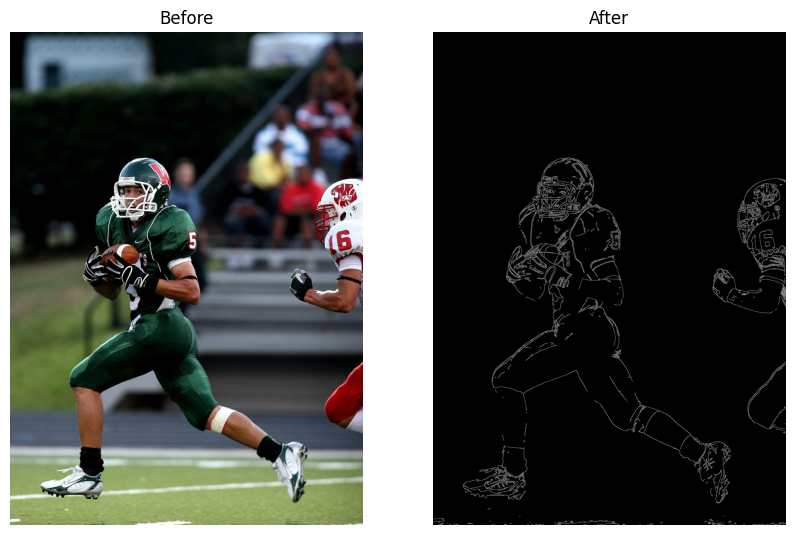

In [10]:
# Aplicando o filtro Canny() em uma imagem
# As imagens estão sendo abertas em uma janela

import cv2
import numpy as np

img = cv2.imread('./images/q5.jpg')
canny_image = cv2.Canny(img, 150, 250, apertureSize=3)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
canny_image = cv2.cvtColor(canny_image, cv2.COLOR_GRAY2RGB)

# Mostrando as imagens
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 10))

ax1.imshow(img)
ax1.set_title('Before')
ax1.set_axis_off()

ax2.imshow(canny_image)
ax2.set_title('After')
ax2.set_axis_off()

### Questão 5 - Continuação

#### Influencia dos parâmetros threshold1, threshold2 e apertureSize:
#### Threshold1
O threshold1 é o parâmetro que indica o limiar mínimo para um pixel ser realmente 
considerado como uma aresta, pixels com um gradiente abaixo desse limiar são descartados. 
Consequentemente, maiores valores para o threshold1 fazem com que menos arestas 
sejam detectadas.
#### Threshold2
Já o threshold2, é o parâmetro que indica o limiar máximo, ou seja, qualquer 
pixel acima desse valor será automaticamente considerado como uma aresta e representado
com linhas fortes. Isso quer dizer que se diminuirmos o threshold2, mais arestas fortes 
seriam consideradas por motivo dos valores dos pixels estarem acima desse limiar máximo,
aumentando a quantidade de detalhes na imagem e possivelmente gerando mais ruido.
#### Aperture_size
O apertureSize é um parametro opicional que tem seu valor predefinido em "3", 
também podendo ser "5" ou "7". Ao aumentarmos o apertureSize 
mais detalhes na imagem serão detectados, o que é útil para detectar bordas mais finas ou suaves, 
e se diminuirmos o apertureSize, menos detalhes na imagem serão detectados. 


## Questão 6

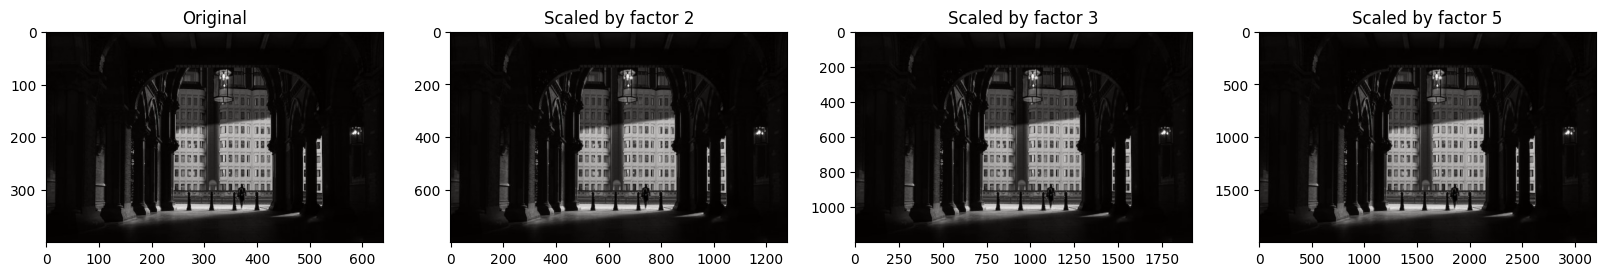

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def scale_image(img, s):
    # Altura e largura da imagem original
    h, w = img.shape[:2]

    # Novas dimensões da imagem
    new_h, new_w = s*h, s*w

    scaled_img = np.zeros((new_h, new_w, img.shape[2]), dtype=img.dtype)

    # Gerando a nova imagem de maior resolução com a abordagem de vizinho mais próximo
    for i in range(new_h):
        for j in range(new_w):
            ii, jj = int(i/s), int(j/s)
            scaled_img[i,j] = img[ii,jj]

    return scaled_img

img = cv2.imread("./images/q6.jpg")

# fatores
s1 = 2
s2 = 3
s3 = 5

scaled_image1 = scale_image(img, s1)
scaled_image2 = scale_image(img, s2)
scaled_image3 = scale_image(img, s3)

#cv2.imwrite('./images-out/scaled_q6_1.jpg', scaled_image1)
#cv2.imwrite('./images-out/scaled_q6_2.jpg', scaled_image2)
#cv2.imwrite('./images-out/scaled_q6_3.jpg', scaled_image3)

# Display original and scaled images
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
axs[0].imshow(img)
axs[0].set_title("Original")
axs[1].imshow(scaled_image1)
axs[1].set_title("Scaled by factor {}".format(s1))
axs[2].imshow(scaled_image2)
axs[2].set_title("Scaled by factor {}".format(s2))
axs[3].imshow(scaled_image3)
axs[3].set_title("Scaled by factor {}".format(s3))
plt.show()

## Questão 7

In [ ]:
# here includes code for the question 7 of the list

# Reference for the pyrDown
# https://docs.opencv.org/3.4/d4/d1f/tutorial_pyramids.html

import cv2
import numpy as np

original_image = cv2.imread('./images/q7.jpg')
# Here the image is shrunken because it was too big to visualize in my monitor
original_image = cv2.resize(original_image, (original_image.shape[1]//8, original_image.shape[0]//8))

downsampled_pyramid = [original_image]
for _ in range(3):
    prev_image = downsampled_pyramid[-1]
    new_height = prev_image.shape[0] // 2
    new_width = prev_image.shape[1] // 2
    result = cv2.resize(prev_image, (new_width, new_height), interpolation=cv2.INTER_CUBIC)
    downsampled_pyramid.append(result)

gaussian_pyramid = [original_image]
for _ in range(3):
    prev_image = gaussian_pyramid[-1]
    new_height = prev_image.shape[0] // 2
    new_width = prev_image.shape[1] // 2
    result = cv2.pyrDown(prev_image, dstsize=(new_width, new_height))
    gaussian_pyramid.append(result)

def get_screen_shape(img):
    h, w, d = img.shape
    return (w + (w // 2), h, d)

def create_formated_picture(pyramid: list) -> np.ndarray:
    # Creating the output array
    formated_images = np.zeros(get_screen_shape(pyramid[0]), np.uint8)
    
    # Filling the major image on the left
    h, w = pyramid[0].shape[:2]
    formated_images[:h,:w,:] = pyramid[0][:,:,:]

    # Filling the adjacent images on the right and bellow
    ph, pw = 0, w
    for image in pyramid[1:]:
        h, w = image.shape[:2]
        formated_images[ph:ph+h,pw:pw+w,:] = image[:,:,:]
        ph += h
    
    return formated_images


downsampled_pyramid_image = create_formated_picture(downsampled_pyramid)
gaussian_pyramid_image = create_formated_picture(gaussian_pyramid)

cv2.imwrite('./images-out/downsampled_pyramid_q7.jpg', downsampled_pyramid_image)
cv2.imwrite('./images-out/gaussian_pyramid_q7.jpg', gaussian_pyramid_image)

### Questão 8

In [ ]:
# here includes code for the question 8 of the list

# Referência para o Sobel em imagens
# https://en.wikipedia.org/wiki/Sobel_operator

import cv2
import numpy as np

from q1 import apply_filter

deriv_kernel_x = np.array([
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1],
])

deriv_kernel_y = np.array([
    [-1, -1, -1],
    [ 0,  0,  0],
    [ 1,  1,  1],
])

sobel_kernel_x = np.array([
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1],
])

sobel_kernel_y = np.array([
    [ 1,  2,  1],
    [ 0,  0,  0],
    [-1, -2, -1],
])

images_filepath = ['./images/q7.jpg', './images/q8_1.jpg', './images/q8_2.jpg']

def get_image(filepath):
    image = cv2.imread(filepath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    h, w = image.shape
    # The image is resized for it to be faster
    return cv2.resize(image, dsize=(w // 16, h // 16))

images = [get_image(filepath) for filepath in images_filepath]

def derivative_x(image):
    return apply_filter(image, 3, deriv_kernel_x.flatten())

def derivative_y(image):
    return apply_filter(image, 3, deriv_kernel_y.flatten())

def gradient(deriv_x, deriv_y):
    return np.abs(deriv_x) + np.abs(deriv_y)

def sobel(image):
    der_sobel_x = apply_filter(image, 3, sobel_kernel_x.flatten())
    der_sobel_y = apply_filter(image, 3, sobel_kernel_y.flatten())
    sobel_gradient = np.abs(der_sobel_x) + np.abs(der_sobel_y)
    return sobel_gradient

deriv_imgs = []
for names, image in zip(images_filepath, images):
    deriv_x = derivative_x(image)
    deriv_y = derivative_y(image)
    abs_gradient = gradient(deriv_x, deriv_y)
    deriv_imgs.append([deriv_x, deriv_y, abs_gradient])

final_imgs = []
for images in deriv_imgs:
    for image in images:
        sobel_gradient = sobel(image)
        final_imgs.append(sobel_gradient)

for i, imgs in enumerate(deriv_imgs):
    cv2.imwrite(f'./images-out/deriv_x_{i}_q8.jpg', imgs[0])
    cv2.imwrite(f'./images-out/deriv_y_{i}_q8.jpg', imgs[1])
    cv2.imwrite(f'./images-out/grad_{i}_q8.jpg', imgs[2])

grouped_final_imgs = [final_imgs[i:i+3] for i in range(0, len(final_imgs), 3)]
for i, img in enumerate(grouped_final_imgs):
    cv2.imwrite(f'./images-out/sobel_x_{i}_q8.jpg', img[0])
    cv2.imwrite(f'./images-out/sobel_y_{i}_q8.jpg', img[1])
    cv2.imwrite(f'./images-out/sobel_grad_{i}_q8.jpg', img[2])